# Ground Truth Assigment
This notebook looks at the different ways of assigning ground truths to a network. We have three possible methods to investigate:

* **Community Weighting**: Find the communities of our graph (using PLM). Then assign each of these a mean from $N($global mean, std_dev$)$ and assign values to the nodes within each community based on the parent mean.
* **Traversal Weighting**: Assign a random node with the target mean. Then assign each neighbour of node $n$ that hasn't been assigned a mean yet the value $n + X$ where $X \sim N(0, sigma)$. Repeat this with their neighbours, and so on, thus propagating tiny changes that should add to no overall change in the mean. At the end, the resulting weights are normalised to have the target average.
* **Traversal Weighting With Averages**: Same as Traversal Weighting, but instead of only assigning a value when a node has never been assigned a value, whenever it would be assigned a value we add it to a set. Whenever that value is needed, we average all of the values got so far. (Thus by the end each node's value is the average of the different values it got from each of its neighbours.)

In [2]:
from src.graph.generation.algo.compositeGenerator import CompositeGenerator
from src.graph.temporal.weighting.communityWeighting import assign_community_weights
from src.graph.temporal.weighting.traverseWeighting import assign_traverse_averaged, assign_traverse_weights
from networkit.viztasks import drawGraph
import networkit as nk

import matplotlib.pyplot as plt


In [3]:
g = CompositeGenerator(50, 5, 2, 0.1, 2,  0.1).generate()

def label_graph(g, ws):
    ws_d = {}
    for i in range(len(ws)):
        ws_d[i] = str(round(ws[i], 3)) + " (" + str(i) + ")"

    plt.figure(figsize=(40,40))
    drawGraph(g, with_labels=True, labels=ws_d, font_size=60)
    plt.show()

The below box shows the result of each of the three different weighting schemes.

In [6]:
label_graph(g, assign_community_weights(g, 0.5, 0.05))
label_graph(g, assign_traverse_weights(g, 0.5, 0.05))
label_graph(g, assign_traverse_averaged(g, 0.5, 0.05))

KeyboardInterrupt: 

The below box shows the effect of changing the standard deviation.

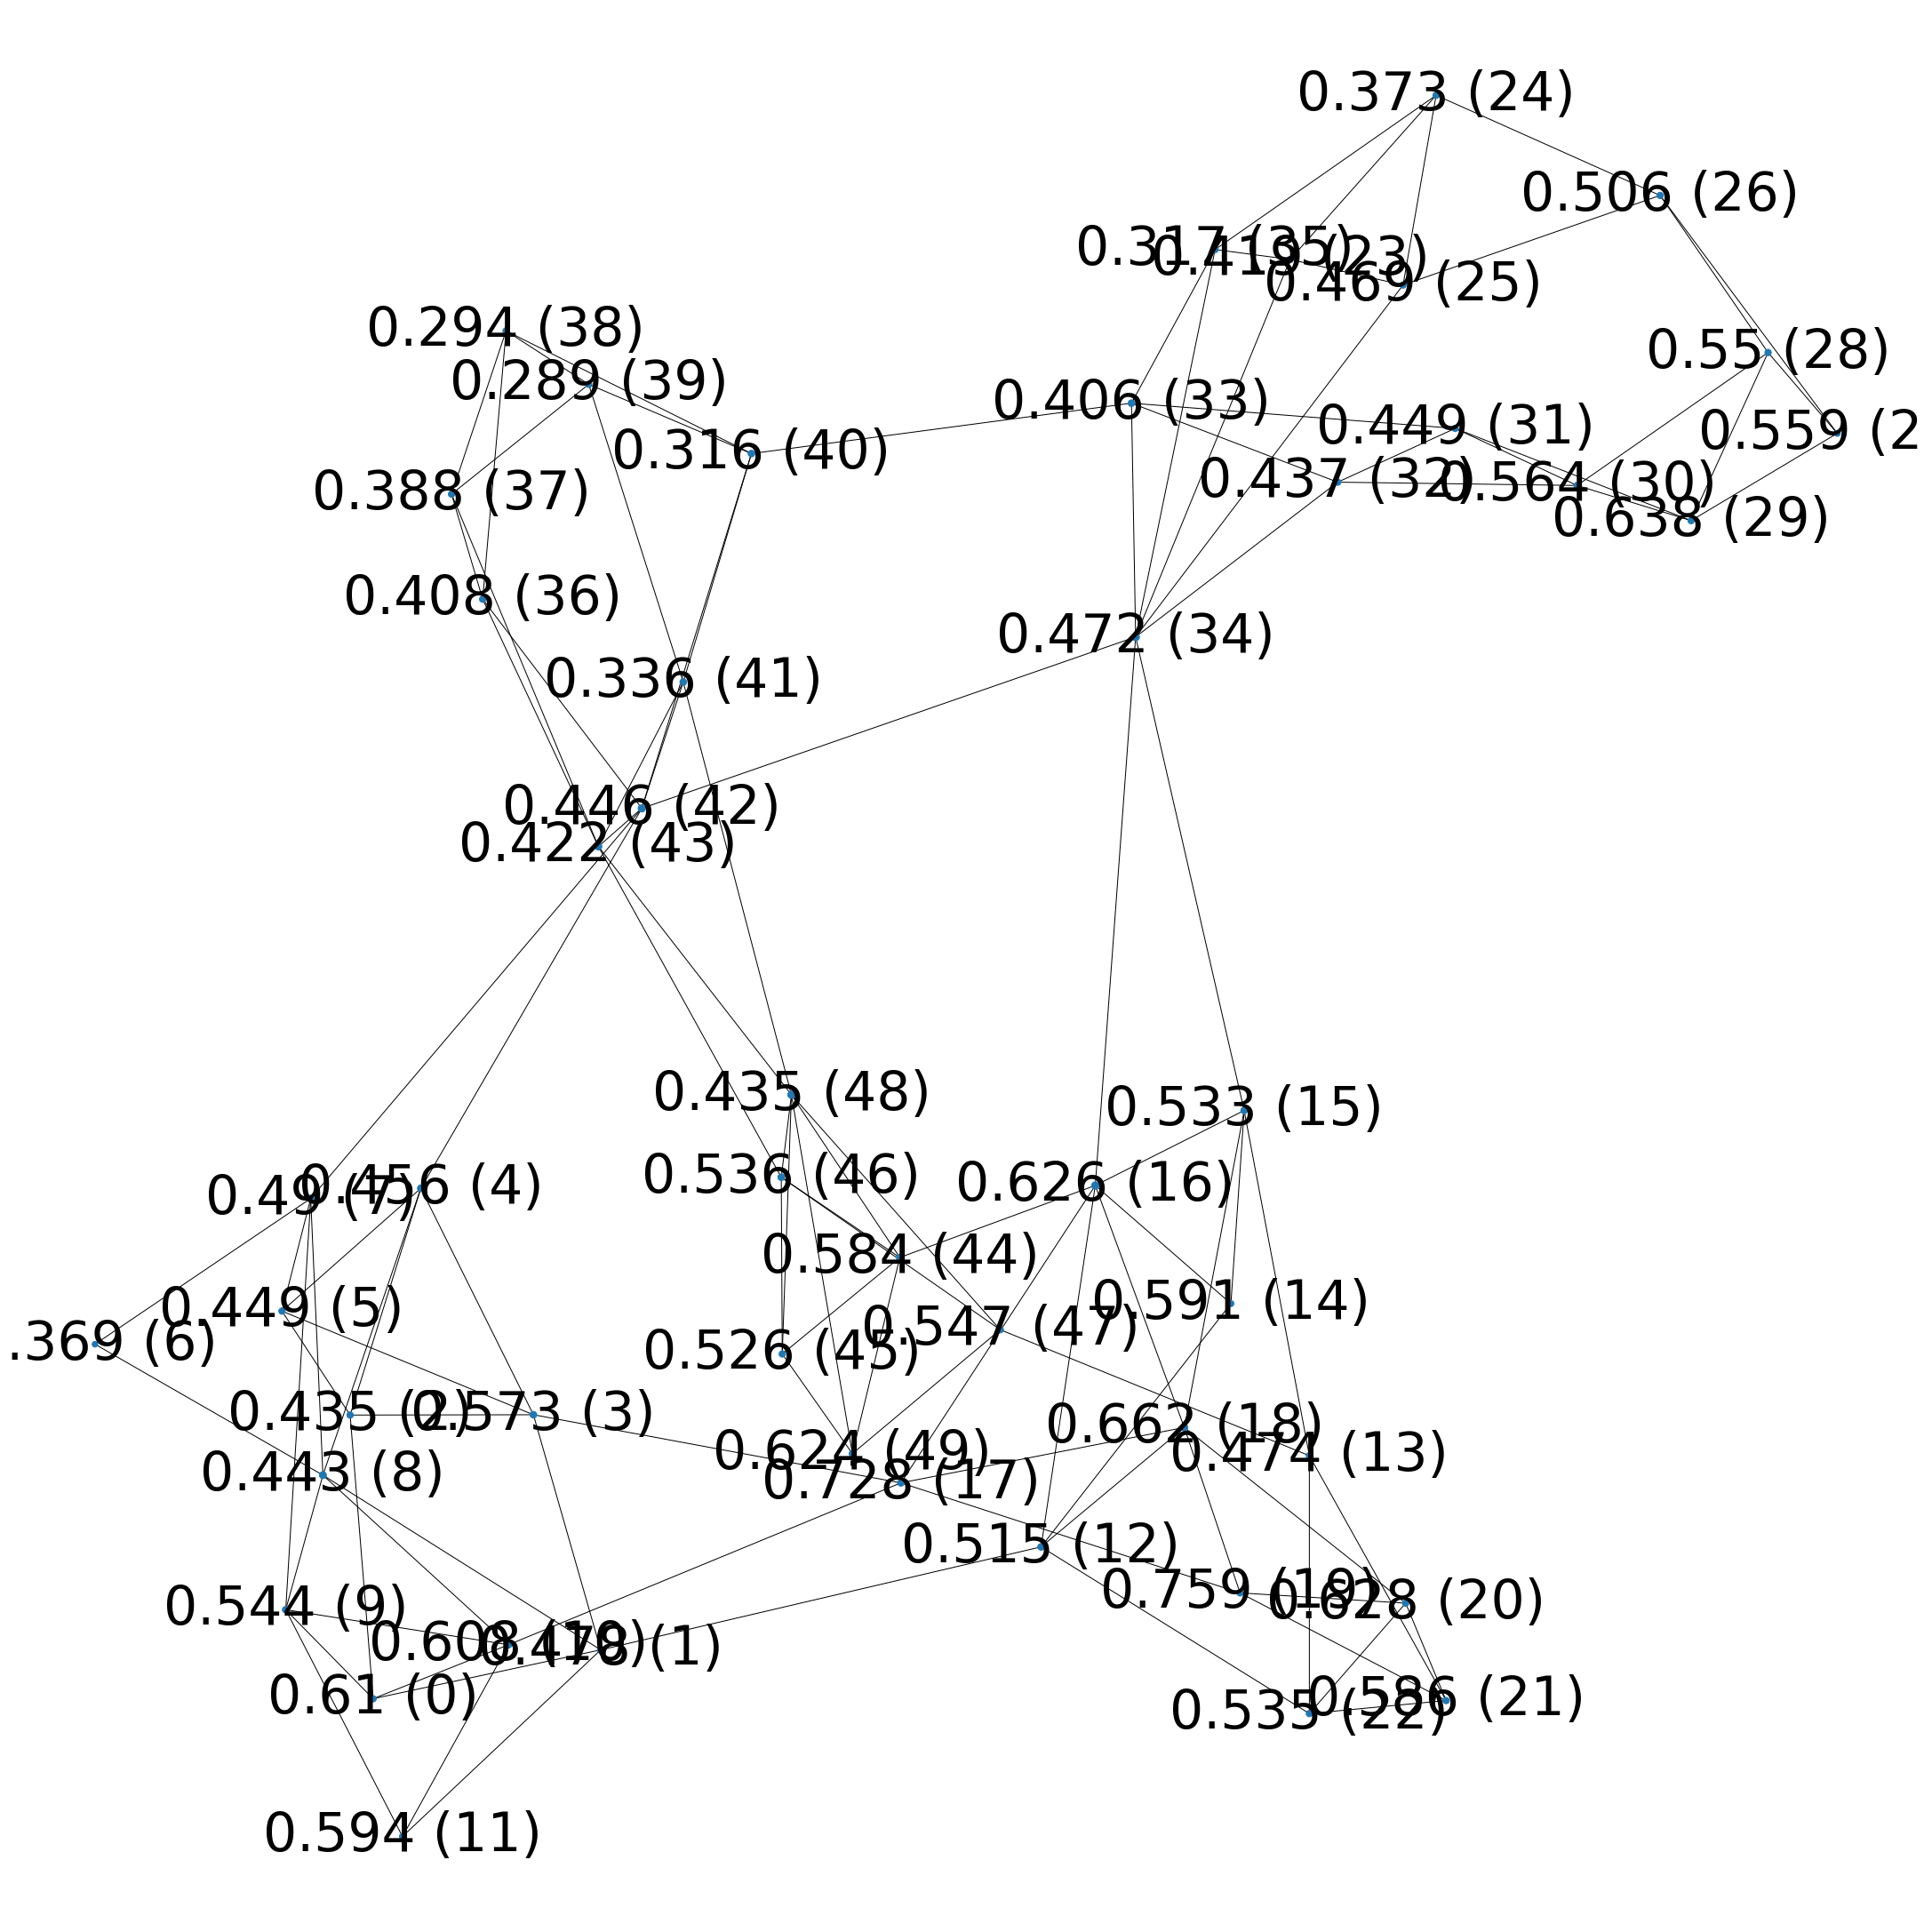

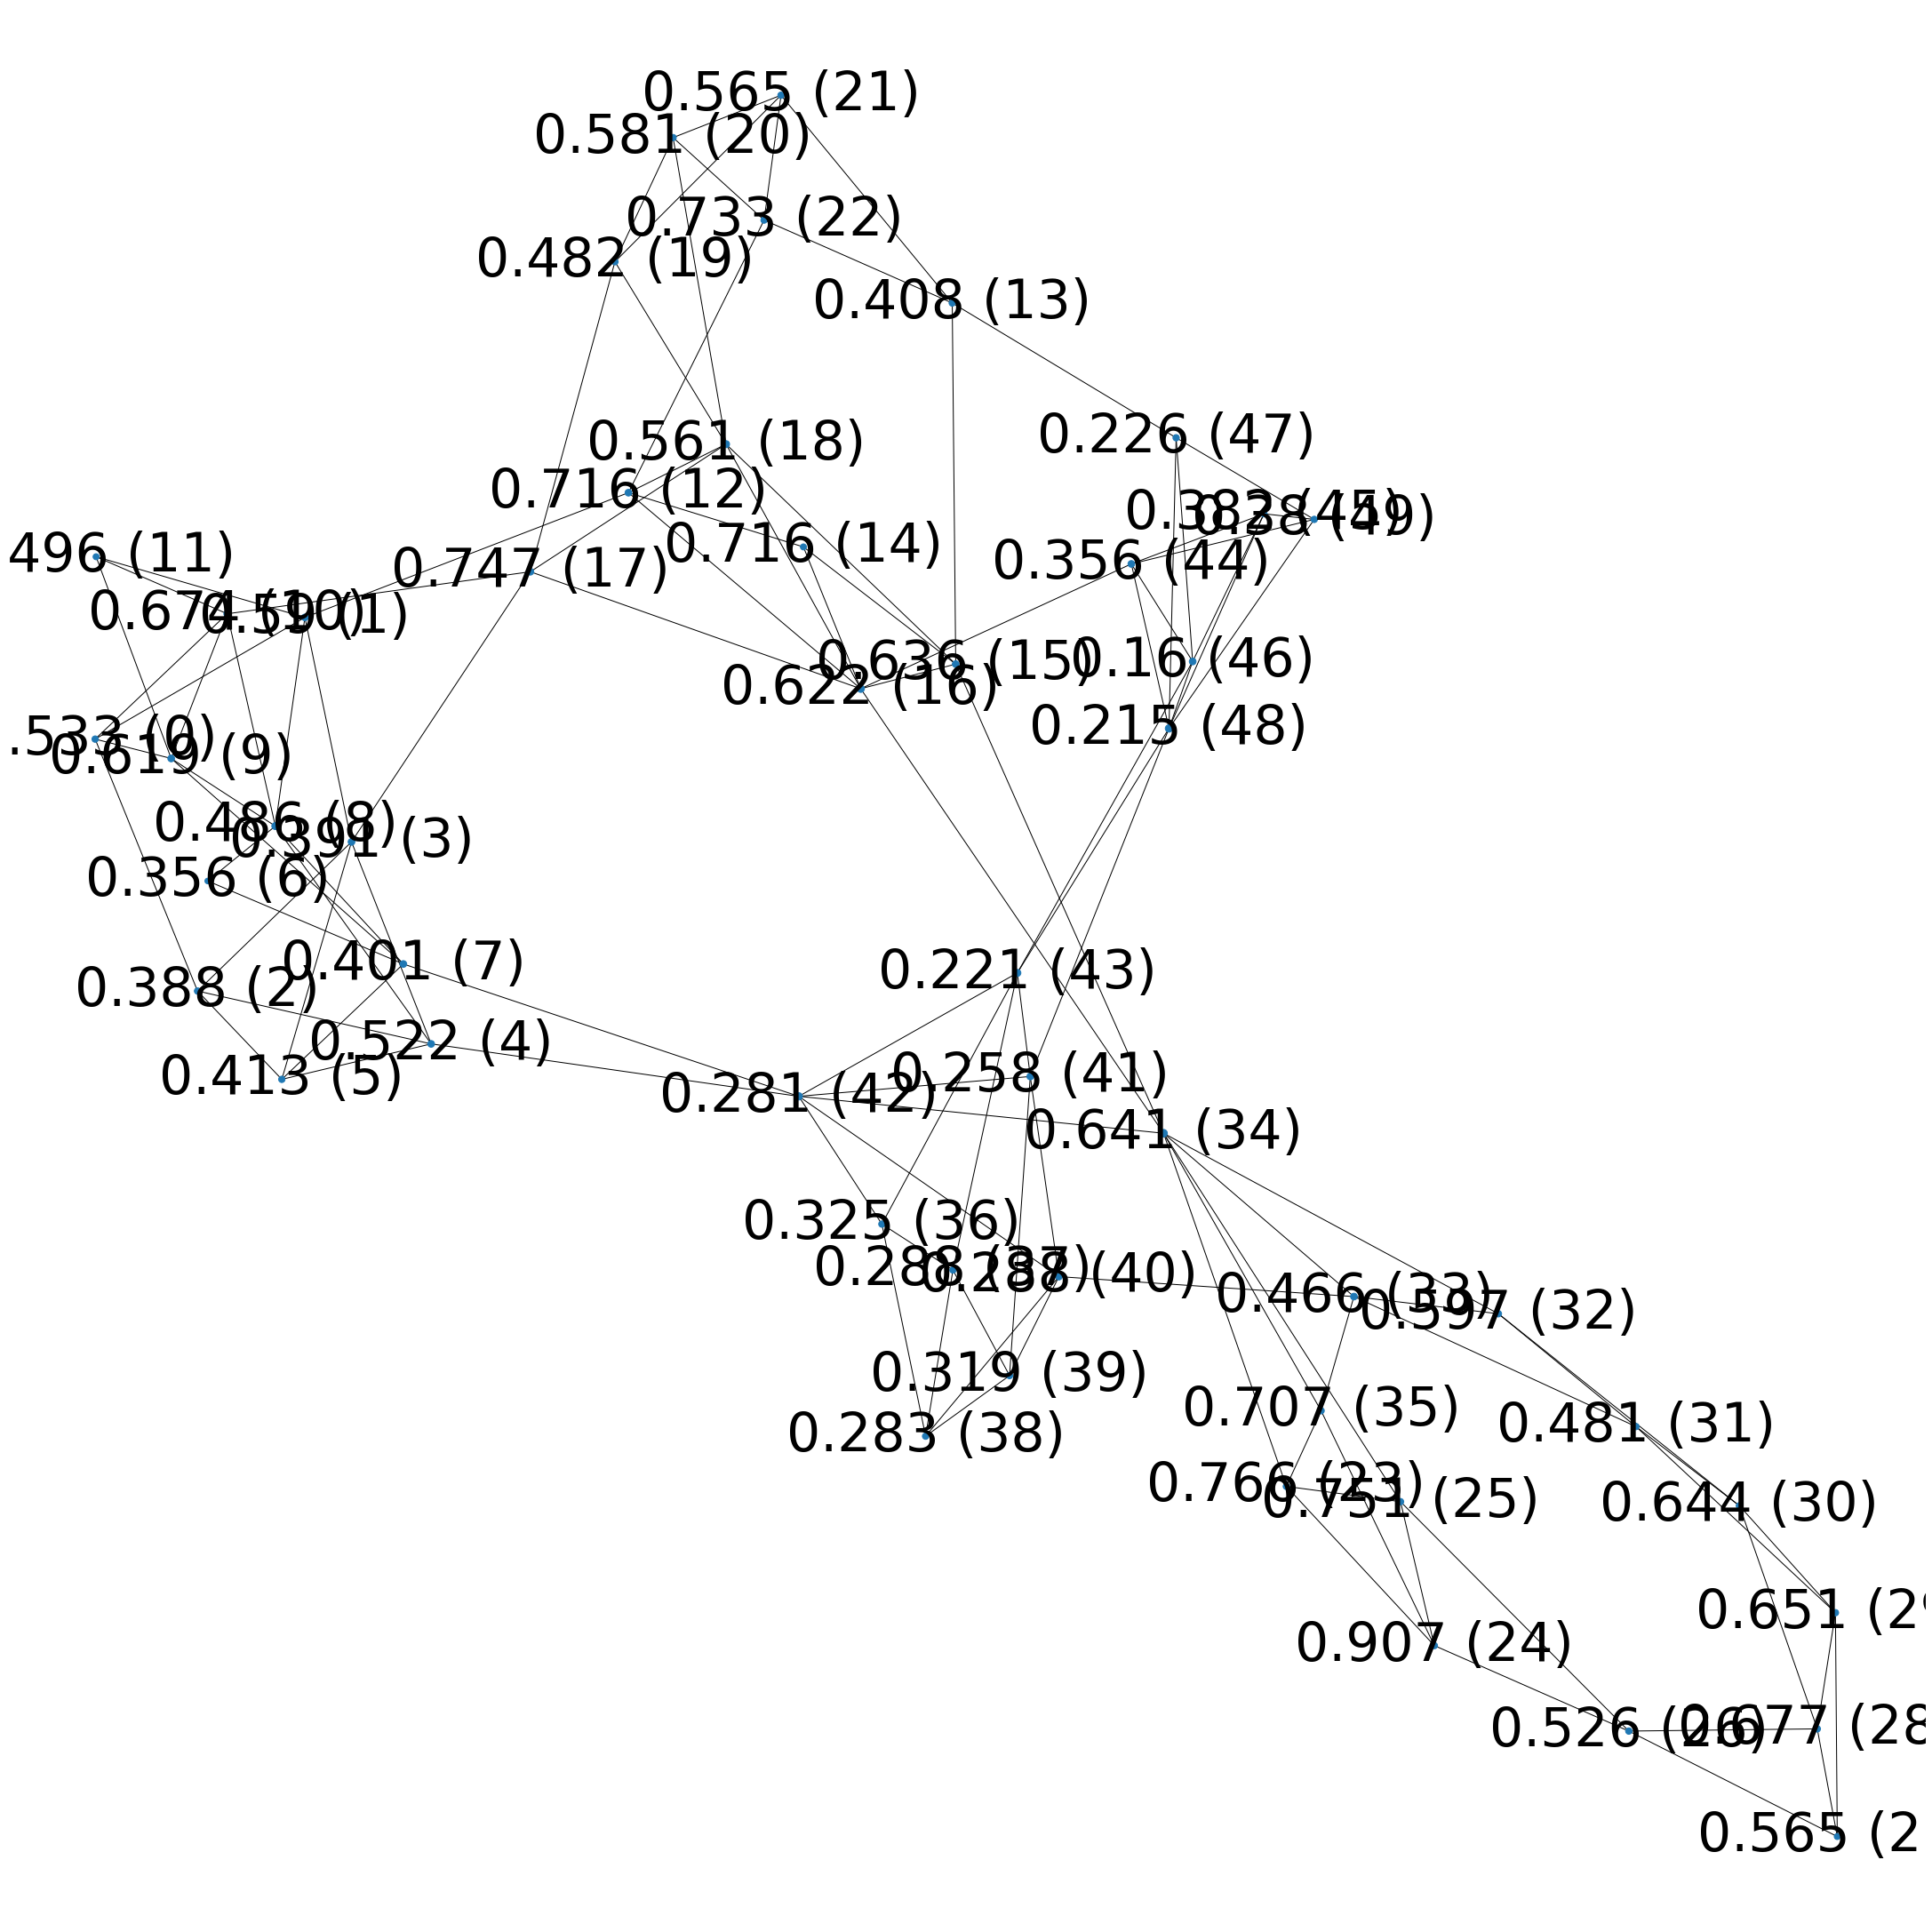

In [4]:
label_graph(g, assign_traverse_averaged(g, 0.5, 0.1))
label_graph(g, assign_traverse_averaged(g, 0.5, 0.2))